<a href="https://colab.research.google.com/github/tomoharukawamura/python/blob/master/third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 使いまわすコード

In [1]:
import math
import numpy as np

# ベクトルxのL2ノルムを計算
def norm2(n, x):
    res = 0
    for i in range(n):
        res += x[i]**2
    res = math.sqrt(res)
    return res

# 行列Aとベクトルxの行列ベクトル積Axを計算
def matvec(n, A, x):
    res = np.zeros(n)
    for i in range(n):
        tmp = 0
        for j in range(n):
            tmp += A[i][j]*x[j]
        res[i] = tmp

    return res

# ベクトルxとベクトルyの内積を計算
def inner_product(n, x, y):
    res = 0
    for i in range(n):
        res += x[i]*y[i]

    return res

def calc_inverse_matrix(n,A):
  B=np.eye(n)
  for j in range(0,n,1):
    for i in range(j+1,n,1):
      coe = -A[i][j]/A[j][j]
      for k in range(n):
        A[i][k]+=coe*A[j][k]
        B[i][k]+=coe*B[j][k]
  for j_2 in range(n-1,0,-1):
    for i_2 in range(j_2-1,-1,-1):
      coe_2 = -A[i_2][j_2]/A[j_2][j_2]
      for k_2 in range(n):
        B[i_2][k_2]+=coe_2*B[j_2][k_2]
  for i_3 in range(n):
    for j_3 in range(n):
      B[i_3][j_3]=B[i_3][j_3]/A[i_3][i_3]
  return B

In [ ]:
from numpy.matrixlib.defmatrix import matrix
import matplotlib.pyplot as plt
%matplotlib inline
#n番目の固有値と固有ベクトルを求める
def n_th_eigen_value(n,A,y_0,pre_eigen_vectors):
  y=y_0
  diff=1
  times=0
  err=10**-10
  while abs(diff) > err:
    times+=1
    internal_y=matvec(n,A,y)
    in_for_y=internal_y
    for eigen_vec in pre_eigen_vectors:
      inner_pro_base=inner_product(n,eigen_vec,internal_y)
      in_for_y-=inner_pro_base*eigen_vec
    internal_y=in_for_y
    y=internal_y/norm2(n,internal_y)
    inner_pro=inner_product(n,matvec(n,A,y),y)
    if times>=2:
      diff=inner_pro - pre_res
    pre_res=inner_pro
  return {
      'vec':y,
      'val':1/inner_pro if is_inv else inner_pro
  }

#行列Aを生成
def prepare_matrix(n):
  matrix=np.zeros((n,n))
  for i in range(n-1,-1,-1):
    if i==n-1:
      matrix[i][i]=-1
    else:
      matrix[i][i]=-2
      matrix[i][i+1]=1
      matrix[i+1][i]=1
  return matrix

def calc_eigen(n,y_0,is_inv):
  eigen_vecs=[]
  res_dict=[]
  A= calc_inverse_matrix(n,prepare_matrix(n)) if is_inv else prepare_matrix(n)
  for i in range(1,n+1):
    dict=n_th_eigen_value(n,A,y_0,eigen_vecs,is_inv)
    freqency=math.sqrt(-dict['val'])
    vec=dict['vec']
    eigen_vecs.append(vec)
    res_dict.append({
        'freq':freqency,
        'vec':vec
    })
  return res_dict

def plot_and_freq(n,y,is_inv):
  dicts=calc_eigen(n,y,is_inv)
  for dict in dicts:
    vec=[0]
    for num in dict['vec']:
      ratio= num/dict['vec'][0]
      vec.append(ratio)
    plt.plot(vec)
    vec.pop(0)
    dict['vec']=vec
  return dicts

## (1)

[{'freq': 1.6180339887498416, 'vec': [1.0, -0.6180336050573948]},
 {'freq': 0.6180339887500343, 'vec': [1.0, 1.618034993270525]}]

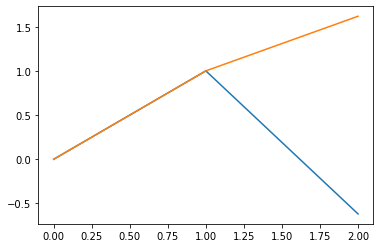

In [ ]:
y=np.array([5,2])
plot_and_freq(2,y,False)

## (2)

[{'freq': 1.9418836348041388,
  'vec': [1.0,
   -1.7708927944488804,
   2.1360735129769717,
   -2.0118999324519034,
   1.4268398397175586,
   -0.5149311632128015]},
 {'freq': 1.7709120513314178,
  'vec': [1.0,
   -1.13613463558612,
   0.29078791345969385,
   0.8057856550435348,
   -1.2062823983372055,
   0.5647067636258293]},
 {'freq': 1.4970214963619193,
  'vec': [1.0,
   -0.24108682751098423,
   -0.9418756302071549,
   0.4681485356479413,
   0.8290173064642311,
   -0.6679917077676464]},
 {'freq': 1.136129493475046,
  'vec': [1.0,
   0.7092013662418782,
   -0.4970288531872037,
   -1.0616954643517624,
   -0.25593967220816194,
   0.8801765881590136]},
 {'freq': 0.7092097740918388,
  'vec': [1.0,
   1.4970176844079877,
   1.2410650753256103,
   0.36088563712462635,
   -0.7008070162397425,
   -1.4100074082623477]},
 {'freq': 0.24107336051101283,
  'vec': [1.0,
   1.9418844120098668,
   2.770914723869808,
   3.438910508334852,
   3.907049594441377,
   4.148124615031024]}]

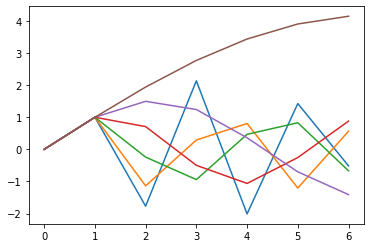

In [ ]:
y=np.array([3,6,4,9,7,1,11])
plot_and_freq(6,y,False)

## (3)

[{'freq': 0.24107336051064635,
  'vec': [1.0,
   1.9418835770022347,
   2.770911852294521,
   3.438904730583739,
   3.9070409447275525,
   4.148114181237808]},
 {'freq': 0.7092097740864513,
  'vec': [1.0,
   1.4970242714719462,
   1.2410795004750572,
   0.36089702835229376,
   -0.700811914690578,
   -1.4100283024782068]},
 {'freq': 1.136129493480909,
  'vec': [1.0,
   0.7092213179303686,
   -0.4970136323354361,
   -1.0617160336545208,
   -0.2559605044152636,
   0.8801937547935395]},
 {'freq': 1.4970214963892594,
  'vec': [1.0,
   -0.24104808677316994,
   -0.941901908078446,
   0.46811586056362625,
   0.8290551360999,
   -0.668000832836197]},
 {'freq': 1.77091205171736,
  'vec': [1.0,
   -1.136128207592825,
   0.2908226822937352,
   0.8056458987357438,
   -1.2060846503072362,
   0.5646101354256515]},
 {'freq': 1.941883634086257,
  'vec': [1.0,
   -1.7709820898183901,
   2.1363332271151227,
   -2.0122967115807033,
   1.4272107878932254,
   -0.5150832968888084]}]

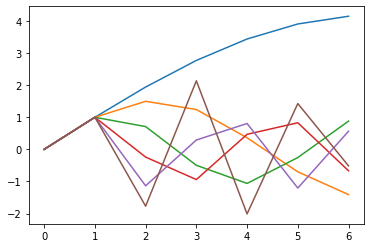

In [ ]:
y=np.array([3,5,1,7,9,2])
plot_and_freq(6,y,True)